In [1]:
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt

In [2]:
def read_v1_lgn_position():
    LGN_vpos_file = '/home/zhaobenyan/dataset/resource/LGN_vpos_minimal-patch.bin'
    fp = 'f4'
    with open(LGN_vpos_file, 'rb') as f:
        nparvo, zero = np.fromfile(f, dtype='u4', count=2)
        ecc = np.fromfile(f, dtype=fp, count=1)[0]
        cart = np.fromfile(f, dtype=fp, count=4)
        parvo_cart = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
        RG_OnOff = np.fromfile(f, dtype='u4', count=nparvo)
        parvo_polar = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))

    return parvo_cart

In [3]:
LGN_vpos_file = '/home/zhaobenyan/dataset/resource/LGN_vpos_minimal-patch.bin'
fp = 'f4'
with open(LGN_vpos_file, 'rb') as f:
    nparvo, zero = np.fromfile(f, dtype='u4', count=2)
    ecc = np.fromfile(f, dtype=fp, count=1)[0]
    cart = np.fromfile(f, dtype=fp, count=4)
    parvo_cart = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
    RG_OnOff = np.fromfile(f, dtype='u4', count=nparvo)
    parvo_polar = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
print(nparvo)
print(ecc)
print(cart[0])
print(parvo_cart.shape)
print(parvo_cart[0])
print(RG_OnOff.shape)
print(parvo_polar.shape)
print(parvo_polar[0])


512
0.010245659
-0.034404937
(2, 512)
[-1.57239176e-02 -2.17644833e-02 -1.04170255e-02 -2.08611544e-02
 -9.26199183e-03 -1.49836270e-02 -9.67740268e-03 -1.63187291e-02
 -1.94584318e-02 -1.21801188e-02 -2.59378105e-02 -2.47402098e-02
 -1.77083276e-02 -2.92866118e-02 -2.67694164e-02 -2.74196249e-02
 -3.03751044e-02 -2.09628679e-02 -1.52308475e-02 -1.38875321e-02
 -2.11420823e-02 -2.53445953e-02 -4.68495768e-03 -1.59501452e-02
 -1.15269506e-02 -5.65129425e-03 -4.15120693e-03 -7.83769507e-03
 -1.40846102e-03 -8.35900102e-03 -1.30908154e-02 -4.63404984e-04
 -1.22528141e-02 -8.98486003e-04  3.74979340e-03 -2.73137242e-02
 -3.34417857e-02 -3.23070250e-02 -2.04255674e-02 -2.52267495e-02
  3.78856785e-03  8.21720518e-04 -5.03721507e-03 -2.11203359e-02
  1.23898045e-03  4.70380019e-03 -5.81172435e-03 -5.65600209e-03
 -9.40694183e-04 -5.43900416e-04 -7.70487497e-03  4.73084440e-03
 -2.02746205e-02 -1.25136403e-02  8.18559993e-03  9.56759695e-03
 -1.87656879e-02 -2.61299927e-02 -1.38084171e-02 -1.

In [49]:
# def acuity(ecc):
#    k = 0.2049795945022049
#    log_cpd0 = 3.6741080244555278
#    cpd = np.exp(-k*ecc + log_cpd0)
#    return 2/cpd/4  #1:半径 2：直径 单位：角度（degrees）

# def compute_lgn_radius():
#     parvo_cart=read_v1_lgn_position()
#     eccs = np.sqrt(np.sum(parvo_cart ** 2, axis=1))
#     radius=acuity(eccs)
   #  return parvo_cart,radius

In [50]:
# parvo_cart,radius=compute_lgn_radius()
# print(parvo_cart.shape)

(2, 512)


acuity(range_deg)=0.012775782312929865
range_deg = 0.0344, buffer_deg = 0.05110312925171946
range_deg+buffer_deg=0.08550312925171946
deg_per_pixel=0.005343945578232466
x=[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
acuity(x)=[0.01268601 0.01271204 0.01273813 0.01276426 0.01279046 0.0128167
 0.012843   0.01286935 0.01289576 0.01292222 0.01294873]


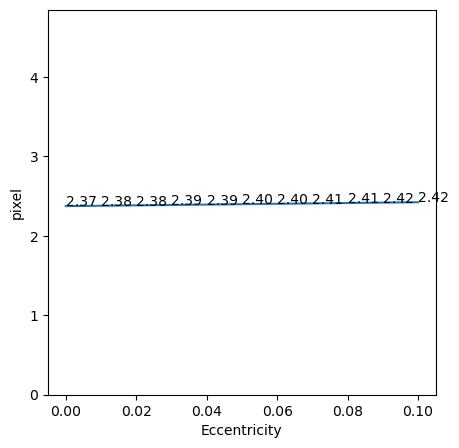

In [17]:
def acuity(ecc):
   k = 0.2049795945022049
   log_cpd0 = 3.6741080244555278
   cpd = np.exp(-k*ecc + log_cpd0)
   return 2/cpd/4  #1:半径 2：直径 单位：角度（degrees）
npixel=32
range_deg = 0.0344#0.12672379774682216 # eccentricity from the origin
print(f'acuity(range_deg)={acuity(range_deg)}')
buffer_deg = acuity(range_deg)*4   #如果acuity(ecc)是1/，这里*2，如果acuity(ecc)是2/，这里*4
print(f'range_deg = {range_deg}, buffer_deg = {buffer_deg}')
print(f'range_deg+buffer_deg={range_deg+buffer_deg}')
deg_per_pixel=2*(range_deg+buffer_deg)/npixel  #这里应该乘2
print(f'deg_per_pixel={deg_per_pixel}')

#画图
x = np.linspace(0, 0.1, 11)
print(f'x={x}')
print(f'acuity(x)={acuity(x)}')
y = acuity(x)/deg_per_pixel   
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y)
plt.ylim(0,np.max(y)*2)
for i, j in zip(x, y):
    ax.text(i, j, '{:.2f}'.format(j))
ax.set_xlabel('Eccentricity')
ax.set_ylabel('pixel')
plt.show()

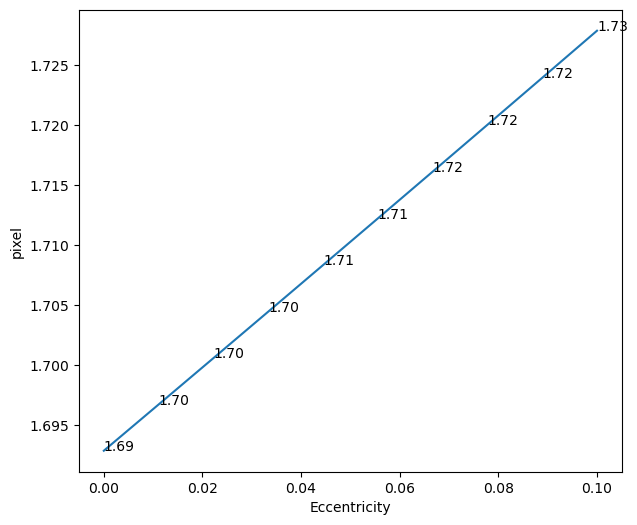

In [52]:
x = np.linspace(0, 0.1, 10)
y = acuity(x)/deg_per_pixel   
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(x, y)
# plt.ylim(0)
for i, j in zip(x, y):
    ax.text(i, j, '{:.2f}'.format(j))
ax.set_xlabel('Eccentricity')
ax.set_ylabel('pixel')
plt.show()

In [24]:
#读取grating的数据  file:文件路径 static_color-grid_{}.bin类型的文件.并转化为(size,size,3)大小的数组
#只适用于nFrame=1的grating
def image_to_tensor(file):
    with open(file) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        image_numpy = x_6.reshape(3,size, size)
    return image_numpy.transpose([1,2,0])

(32, 32, 3)


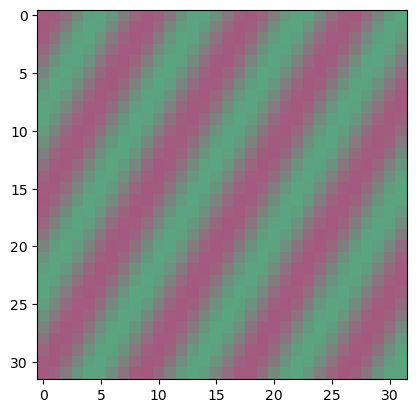

In [25]:
# 读取图像
file='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate1_phase=pi/static_color-grid_3.bin'
pixel_array = image_to_tensor(file)
print(pixel_array.shape)
plt.imshow(pixel_array)


<Figure size 600x600 with 0 Axes>

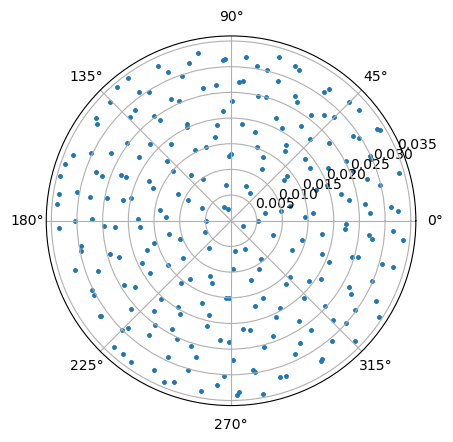

In [12]:
# 生成随机点的笛卡尔坐标
points = parvo_cart
radii = radius
fig = plt.figure(figsize=(6, 6))
# fig = plt.figure(facecolor='none')
fig = plt.figure()
fig.patch.set_alpha(0.0) # 将背景透明度设置为 0
ax1 = fig.add_subplot(111, projection='polar')
# 将笛卡尔坐标转换为极坐标
r = np.sqrt(points[0, :]**2 + points[1, :]**2)
theta = np.arctan2(points[1, :], points[0, :])
# 绘制极坐标图
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax1.scatter(theta, r, s=5)
plt.show()